## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata,study_results, how="outer", on="Mouse ID")

# Display the data table for preview
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice. Should be 
len(complete_data['Mouse ID'].unique())

249

In [3]:
#filter for duplicated Mouse ID and Times
complete_data.duplicated(subset = ['Mouse ID','Timepoint']).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [4]:
#show the Mouse with the duplicated data
complete_data[complete_data.duplicated(subset = ['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# drop the Mouse with duped data
# all data for g989 was dropped due to differences in the Tumor Volume
#since we are unable to determine which was the valid data set, both sets were dropped. 
clean_data = complete_data.loc[(complete_data['Mouse ID'] != 'g989'),:]

In [6]:
#check to make sure the dupe mouse was dropped
clean_data[clean_data.duplicated(subset = ['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_data['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
by_regimen = clean_data.groupby('Drug Regimen')
tvmean_by_reg = by_regimen['Tumor Volume (mm3)'].mean()
tvmedian_by_reg = by_regimen['Tumor Volume (mm3)'].median()
tvvar_by_reg = by_regimen['Tumor Volume (mm3)'].var()
tvstd_by_reg = by_regimen['Tumor Volume (mm3)'].std()
tvsem_by_reg = by_regimen['Tumor Volume (mm3)'].sem()

tumor_by_regimen = pd.DataFrame({
    "Tumor Mean": tvmean_by_reg,
    "Tumor Median": tvmedian_by_reg,
    "Tumor Variance": tvvar_by_reg,
    "Tumor Standard Deviation": tvstd_by_reg,
    "Standard Error of Mean": tvsem_by_reg
})

tumor_by_regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
by_regimen['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

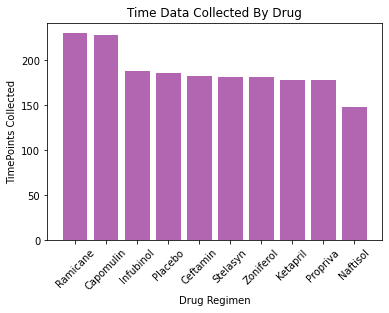

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Panda
time_by_drug = clean_data['Drug Regimen'].value_counts()
drug_names = clean_data['Drug Regimen'].unique()

#plot the data using variables
plt.bar(drug_names,time_by_drug,color="purple",alpha=0.6,width=0.8)

#formatting and labels
plt.xticks(rotation = 45) 
plt.title('Time Data Collected By Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('TimePoints Collected')
plt.show

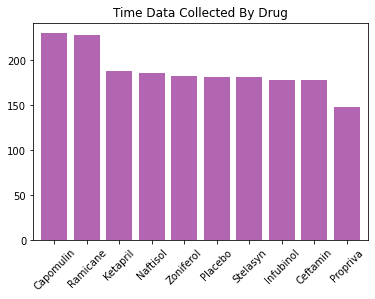

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
count_by_drug = clean_data['Drug Regimen'].value_counts()

#plot directly form series
count_by_drug.plot(kind='bar', color="purple",alpha=0.6,width=0.8,)

plt.xticks(rotation = 45) 
plt.title('Time Data Collected By Drug')
plt.show()

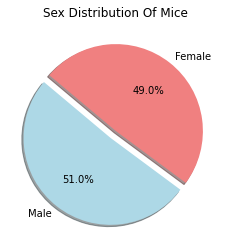

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#creating my variables
sex_counts = clean_data['Sex'].value_counts()
sex_labels = clean_data['Sex'].unique()
colors = ['lightblue','lightcoral']
explode = (0.1,0)

#plotting using the plt.pie function
plt.pie(sex_counts, explode=explode, labels=sex_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Sex Distribution Of Mice')
plt.show()

<AxesSubplot:title={'center':'Sex Distribution Of Mice'}, ylabel='Sex'>

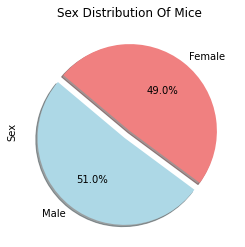

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean_data['Sex'].value_counts()

#plot pie chart directly from the dataframe
sex.plot(kind='pie', colors=['lightblue','lightcoral'], explode = (0.1,0), 
         shadow=True, startangle=140, autopct="%1.1f%%",
         title = 'Sex Distribution Of Mice')

## Quartiles, Outliers and Boxplots

In [48]:
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# pull data for only those drug trials
focus_drugs = clean_data.loc[(clean_data['Drug Regimen'] == 'Ramicane')|
                             (clean_data['Drug Regimen'] == 'Capomulin')|
                             (clean_data['Drug Regimen'] == 'Infubinol')|
                             (clean_data['Drug Regimen'] == 'Ceftamin'),
                             :]
#verifed with .unique
#focus_drugs['Drug Regimen'].unique()

# Start by getting the last (greatest) timepoint for each mouse
grouped_focus_drugs = focus_drugs.groupby('Mouse ID').max()
max_tv = grouped_focus_drugs['Tumor Volume (mm3)']
max_tv

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint?????


Mouse ID
a203    67.973419
a251    65.525743
a275    62.999356
a411    45.466677
a444    45.000000
          ...    
y769    68.594745
y793    45.000000
y865    64.729837
z578    45.000000
z581    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [16]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
